In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [4]:
cohort = "experimental"

data_method = "eval_single"
# data_method = "data_beta"
# eval_method = "eval_mocap"
eval_method = "test1_eval"

scene = "mid_gate"

courses = ["traverse"]   

roster = [
    # "Maverick",
    "hsCameron",
    "hsDavion",
    "hsKurita",
    # "hsLiao",
    # "hsSteiner"
    ]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Output()

Only 1 samples available in [traverse]>trajectories001.pt. Showing all samples.

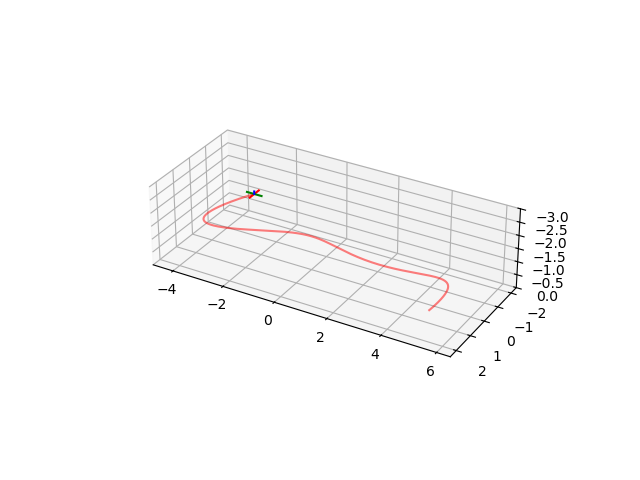

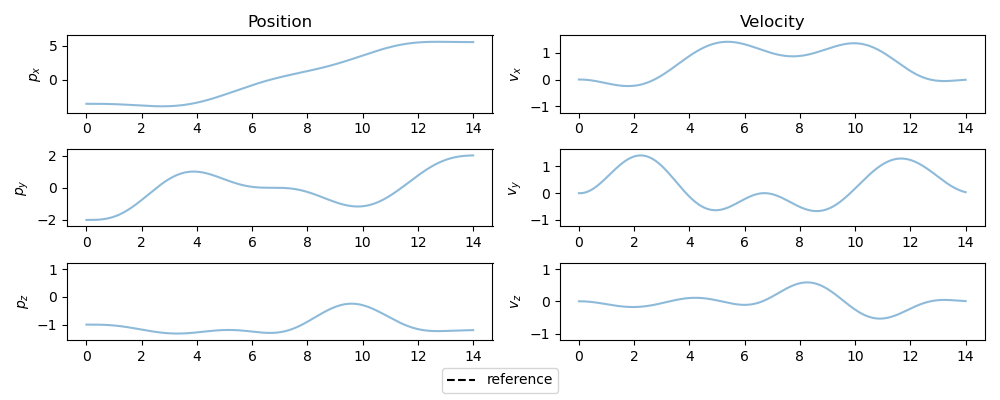

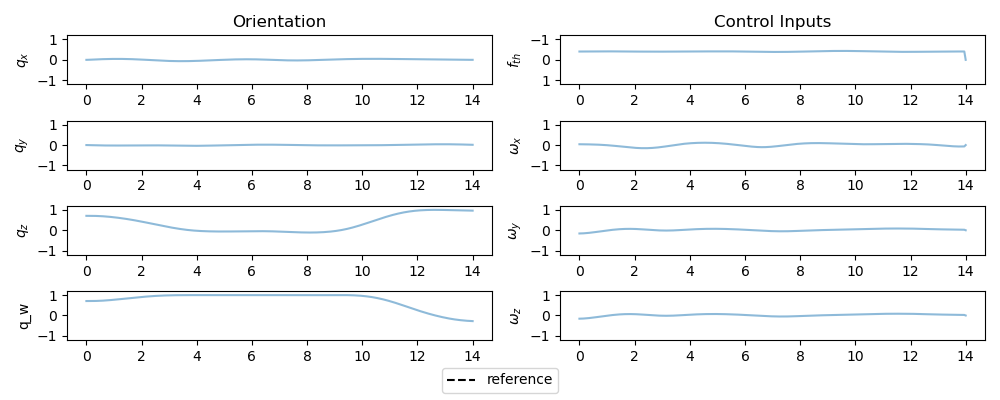

Rollout produced 1 datasets with the following courses: 
traverse  ( 280 dpts) [1 datasets]

In [5]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

In [ ]:
# # tp.train_roster(cohort,roster,"histNet",100)
# tp.train_roster(cohort,roster,"commNet",50)

# pl.plot_losses(cohort,roster,"histNet",use_log=True)

======================================================================
Cohort : experimental           Network: commNet
======================================================================
----------------------------------------------------------------------
Student: hsCameron  | Epochs: 500   | Data Size: 84000.0/1200.0               
Time: 0h 53m 28s    | Train: 0.0078 | Test: 0.0116 | Eval TTE: 0.45
----------------------------------------------------------------------
Student: hsDavion   | Epochs: 500   | Data Size: 84000.0/1200.0               
Time: 2h 19m 52s    | Train: 0.0026 | Test: 0.0086 | Eval TTE: 0.76
----------------------------------------------------------------------
Student: hsKurita   | Epochs: 500   | Data Size: 84000.0/1200.0               
Time: 2h 16m 3s     | Train: 0.0017 | Test: 0.0090 | Eval TTE: 0.71
======================================================================

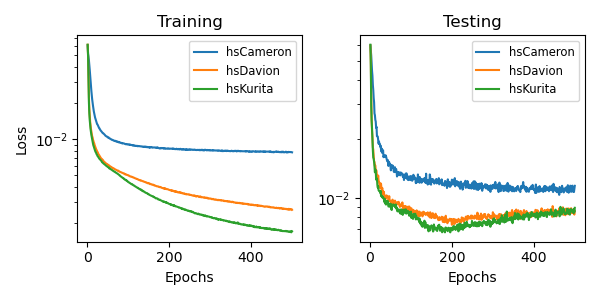

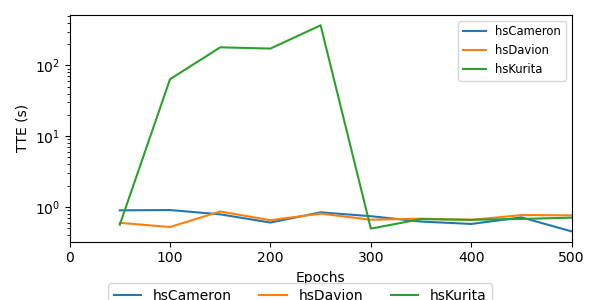

In [4]:
# # Train the Policy
# # tp.train_roster(cohort,yroster,"commNet",200)
# tp.train_roster(cohort,roster,"commNet",500,
#                 use_deploy=scene,deploy_method=eval_method,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

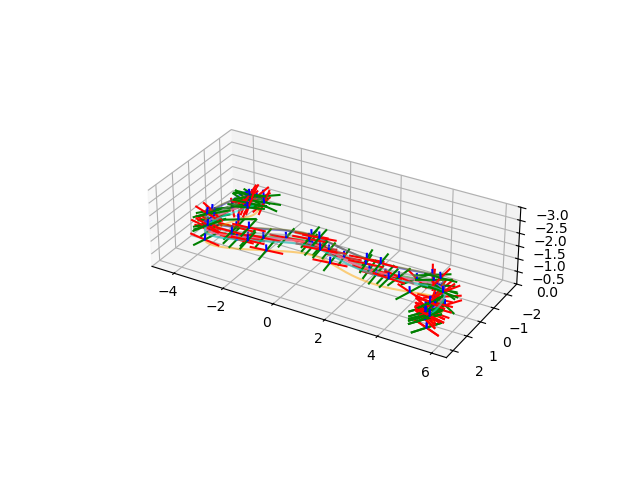

Plotting trajectories for hsCameron...

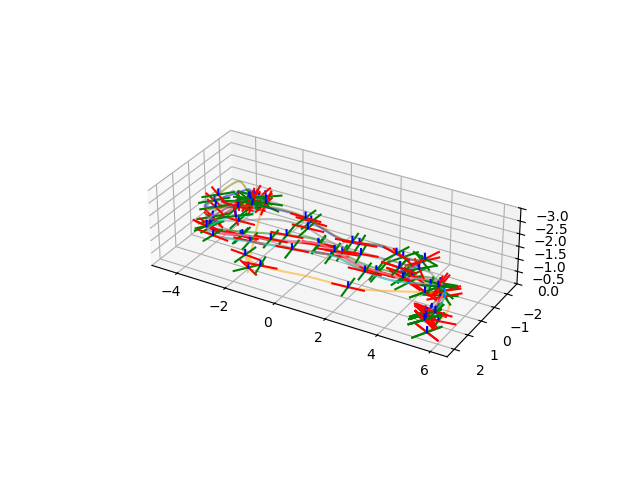

Plotting trajectories for hsDavion...

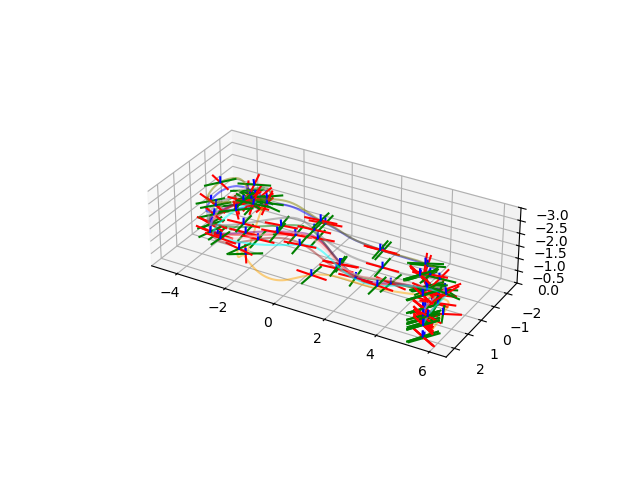

Plotting trajectories for hsKurita...

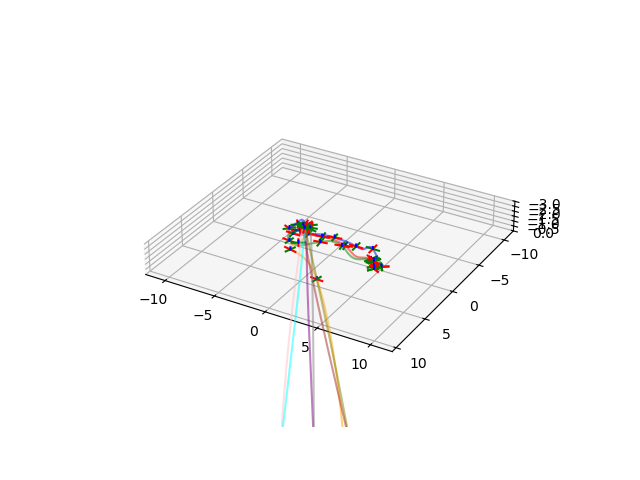

                      Deployment Summary                       
┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot     ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert    │   0.24   │   0.05   │ 0.70 │ 192.97  │  63.63   │
│ hsCameron │   0.50   │   0.10   │ 0.41 │ 1225.13 │  162.65  │
│ hsDavion  │   0.52   │   0.21   │ 0.33 │ 605.92  │  143.22  │
│ hsKurita  │  248.36  │   0.26   │ 0.10 │ 597.77  │  123.61  │
└───────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [6]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)